<a href="https://colab.research.google.com/github/swapnilmungi/Patient_Readmission_Prediction/blob/main/HMGT_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score, roc_auc_score, roc_curve

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import joblib
df = joblib.load('/content/drive/MyDrive/HMGT/Data/ModellingReady2classes.pkl')

In [ ]:
df.head().T

,1,2,3,5,7
gender,0,1,1,1,0
age,25,35,45,65,85
admission_type_id,1,1,1,3,2
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,2,4
time_in_hospital,2,2,1,4,13
num_lab_procedures,11,44,51,70,68
num_procedures,5,1,0,1,2
num_medications,13,16,8,21,28
number_outpatient,2,0,0,0,0


In [ ]:
df.drop(['Other'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55154 entries, 1 to 96445
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   gender                    55154 non-null  int64
 1   age                       55154 non-null  int64
 2   admission_type_id         55154 non-null  int64
 3   discharge_disposition_id  55154 non-null  int64
 4   admission_source_id       55154 non-null  int64
 5   time_in_hospital          55154 non-null  int64
 6   num_lab_procedures        55154 non-null  int64
 7   num_procedures            55154 non-null  int64
 8   num_medications           55154 non-null  int64
 9   number_outpatient         55154 non-null  int64
 10  number_emergency          55154 non-null  int64
 11  number_inpatient          55154 non-null  int64
 12  number_diagnoses          55154 non-null  int64
 13  max_glu_serum             55154 non-null  int64
 14  A1Cresult                 55154 non-nu

In [ ]:
X = df.drop('readmitted',axis=1)
y = df['readmitted']

In [ ]:
df['readmitted'].value_counts()

0    46741
1     8413
Name: readmitted, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=6500)
logit = LogisticRegression()
logit.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_train.value_counts()

0    32782
1     5825
Name: readmitted, dtype: int64

In [ ]:
y_test.value_counts()

0    13959
1     2588
Name: readmitted, dtype: int64

In [ ]:
# Evaluate the model
y_pred = logit.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     13959
           1       0.48      0.05      0.09      2588

    accuracy                           0.84     16547
   macro avg       0.67      0.52      0.50     16547
weighted avg       0.79      0.84      0.78     16547



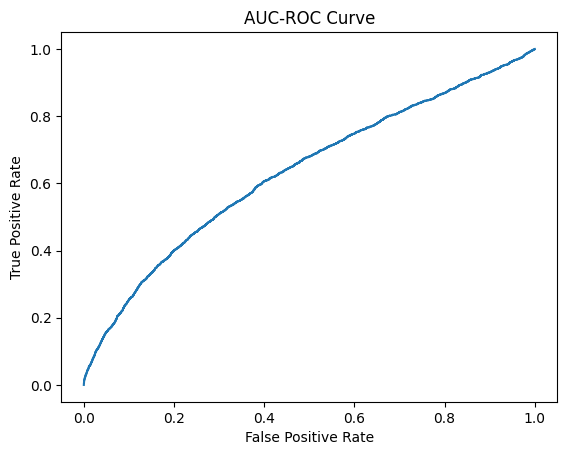

In [ ]:
y_pred_proba = logit.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('AUC-ROC Curve')
plt.show()

In [ ]:
threshold = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy_score_list = []
precision_score_list = []

for th in threshold:
  Pred_class = []
  for i in y_pred_proba:
    if i > th:
      Pred_class.append(1)
    else:
      Pred_class.append(0)
  accuracy_score_list.append(accuracy_score(y_test,Pred_class))
  precision_score_list.append(precision_score(y_test,Pred_class))

In [ ]:
precision_score_list

[0.1668253387037715,
 0.2950418994413408,
 0.3704379562043796,
 0.41700404858299595,
 0.48412698412698413,
 0.5586206896551724,
 0.625,
 0.7714285714285715,
 0.8666666666666667]

In [ ]:
accuracy_score_list

[0.2937088293950565,
 0.7726476098386414,
 0.8264337946455551,
 0.8386414455792591,
 0.8431135553272496,
 0.8446244032150843,
 0.8449265727926513,
 0.8447452710461111,
 0.844261799722004]

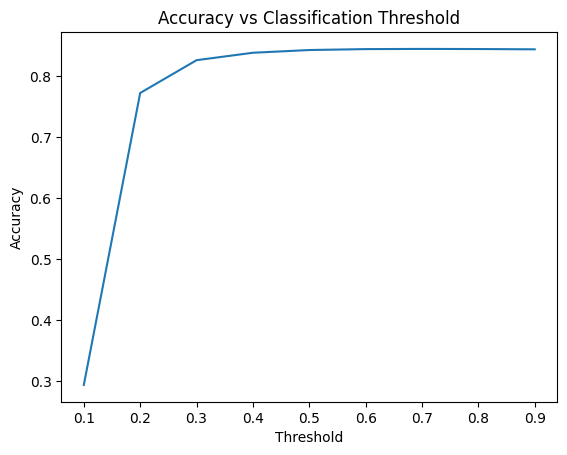

In [ ]:
# plt.figure(figsize=(12,10))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Classification Threshold')
plt.plot(threshold,accuracy_score_list)
plt.show()

In [ ]:
roc_auc_score(y_test, logit.predict_proba(X_test)[:, 1])

0.6327485283961986

In [ ]:
pc = pd.DataFrame(Pred_class,columns=['Target'])
pc['Target'].value_counts()

0    16532
1       15
Name: Target, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy:.2f}")

# Display additional classification metrics
print(classification_report(y_test, y_pred1))


Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     13959
           1       0.22      0.25      0.23      2588

    accuracy                           0.74     16547
   macro avg       0.54      0.54      0.54     16547
weighted avg       0.76      0.74      0.75     16547



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_

# Use best parameters to create the final model
final_rf_classifier = RandomForestClassifier(random_state=42, **best_params)


In [ ]:
final_rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Make predictions on the test set
from sklearn.metrics import accuracy_score, classification_report

final_rf_classifier.fit(X_train, y_train)
y_pred2 = final_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")

# Display additional classification metrics
print(classification_report(y_test, y_pred2))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     13959
           1       0.53      0.03      0.06      2588

    accuracy                           0.84     16547
   macro avg       0.69      0.51      0.49     16547
weighted avg       0.80      0.84      0.78     16547



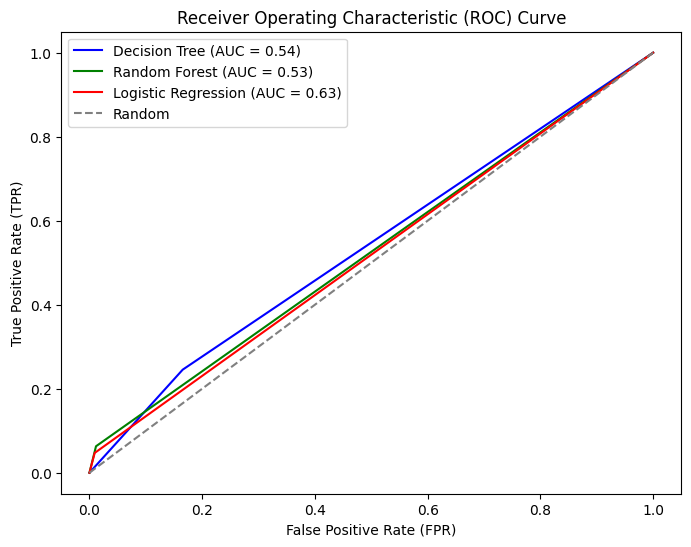

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)
roc_auc_lo = roc_auc_score(y_test, logit.predict_proba(X_test)[:, 1])
# Compute ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred1)
roc_auc_dt = roc_auc_score(y_test, y_pred1)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred2)
roc_auc_rf = roc_auc_score(y_test, y_pred2)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_lo:.2f})', color='red')

# Plot the diagonal line representing random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Customize the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()